# 1. Requiments

You are required to develop a program that:
1. Reads in the data, accessed from: https://archive.ics.uci.edu/ml/datasets/Iris
2. **Assesses the quality of the data**
3. Takes as input arguments the attributes defining a new species of Iris plant
  1. **Returns the ten most similar data points in the existing Iris data, to the inputted arguments of the program**
  2. **Classify the new species into one of the 3 classes using the same inputted arguments**
  
When submitting your solution, you can include:
- A file containing the code for your developed program, submitted in the language of your choice
- Instructions detailing how to build and run your code
- Any tests that you’ve created during development
- A description of how you may expand the solution given more time

# 2. Data quality assessment

**This section answers for [Requirement 2]**. 

The application runs on Python 3, including libraries:
1. [seaborn](http://seaborn.pydata.org/) (data visulization for data quality assessment)
2. [matplotlib](http://matplotlib.org/) (basic plotting)
3. [numpy](http://www.numpy.org/) (work on n-dimensions vector)
4. [pandas](http://pandas.pydata.org/) (using dataframe for plotting)
5. [scikit learn](http://scikit-learn.org/) (enhancing solution)

If you miss some of above libraries, please download and install Anaconda 3. It contains all of above libraries.

## 2.1. Load and count samples

I load standard Iris dataset by using supported API in Scikit Learn: 

```
http://scikit-learn.org/stable/datasets/index.html
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
```

In [516]:
import numpy as np
from sklearn.datasets import load_iris

ds = load_iris()                    # load Iris dataset
X = ds.data                         # get values of features of every sample in dataset
targets = ds.target_names           # get names of classes
y = np.array([targets[t] for t in ds.target]) # get list of classes for every sample in dataset in numeric

The Iris dataset contains 4 features and 3 classes in target. All features are in numeric, and target / label is in text. To easily have a good look of dataset, I dumped its data into `pandas` dataframe and use `seaborn` and `mathplot` to figure out every assessment point.

In [648]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings of seaborn
import warnings
warnings.filterwarnings("ignore")

sns.set(style = "white", color_codes = True)

# Put data to dataframe for visualization
# Note: bug when using seaborn with manually created dataframe, 
#       so I use load_dataset() function instead for this section.

# Manually creating dataframe
#import re
#standard_target_names = ["_".join(re.sub(r'[^\w .]', '', n).split()) for n in ds.feature_names]
#df = pd.DataFrame(data = np.c_[ds.data,[targets[t] for t in ds.target]],
#                  columns = standard_target_names + ['target'])
df = sns.load_dataset("iris")
df.head(10) # show top samples

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


I dropped all samples which contain N/A value. However the number of samples does not change. So, the dataset is dense matrix. That means the dataset is good for learning, and I can ignore feature combination step to convert sparse matrix to dense one.

Howerver, the total number of samples is quite small (150 samples), it may reduce accuracy when applying for real world.

In [435]:
print("Original number of samples:\n", df.count(), 
      "\n\nNumber of samples after dropping N/A:\n", df.dropna().count())

Original number of samples:
 sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64 

Number of samples after dropping N/A:
 sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64


I also check the number of samples in each class to make sure none of this class lacking data for training. If any class only contains few samples, the model (in general) can not converge.

In this case, the number of samples of each class equals by 50.

In [431]:
# See number of samples of each species
df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

## 2.2. Density of every feature

After get some overall counting number about dataset. Now, let's take a look about distribution and dense area of each feature indenpendently. An ideal case is every feature able to seperate its values for every classes.

For example, if a feature `F_1` give similar values for every calss, so it can not refect differences for classes. In this case, we say this feature is useless, otherwise.

Now, we go one by one. Firstly, feature `sepal_length` will be plotted to two below charts. The first one shows the distribution of all samples of 3 classes in the context of: minimum, first quartile, median, third quartile, and maximum. Where we can see it already seperately variance between 2 classes: `setosa` and `virginica`. However, the median of `virginica` and `versicolor` seem to be mix a bit in range [6, 6.5]. So it may cause miss-classify if we only use this feature for classifying.

The second chart show density of every class in different ranges of `sepal_length`. Similar to above chart, it may cause missleading between `virginica` and `versicolor`.

Conclusion: `sepal_length` is good for distinguide `setosa` and (`virginica` or `versicolor`)

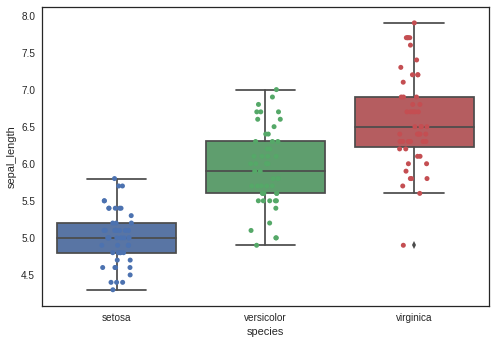

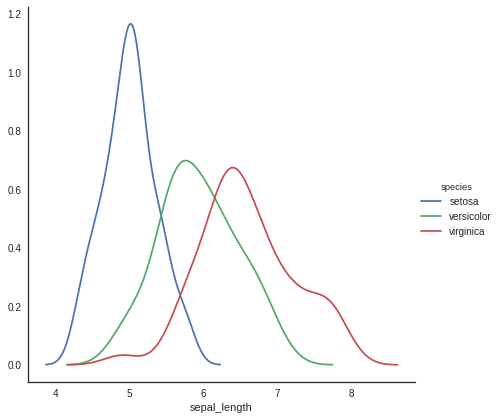

In [476]:
#sns.boxplot(x = "target", y = "sepal_width_cm", data = df)

def feature_density(data, d_field, t_field):
    sns.FacetGrid(df, hue = t_field, size = 6) \
       .map(sns.kdeplot, d_field) \
       .add_legend()
        

def feature_distribution(data, d_field, t_field):
    ax = sns.boxplot(x = t_field, y = d_field, data = data)
    ax = sns.stripplot(x = t_field, y = d_field, data = data, jitter = True, edgecolor = "gray")
    
feature_distribution(df, "sepal_length", "species")
feature_density(df, "sepal_length", "species")

The case of feature `sepal_width` is similar to `sepal_length`, but a bit harder to seperate `setosa` with (`virginica` or `versicolor`) like `sepal_length` because of mixxing.

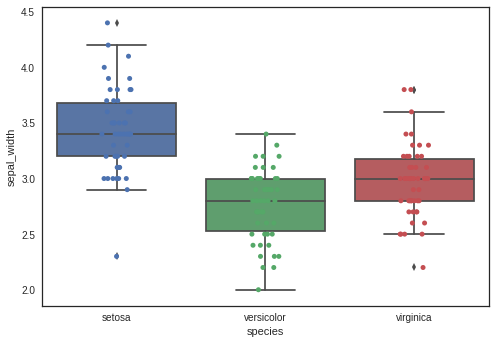

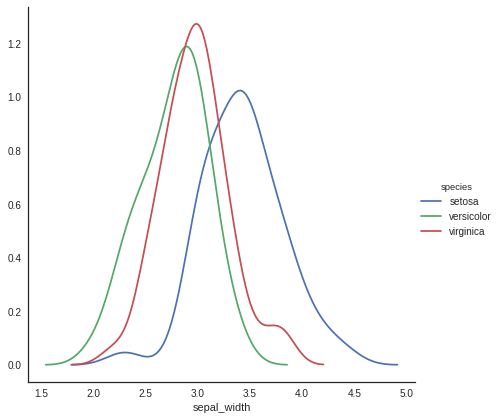

In [477]:
feature_distribution(df, "sepal_width", "species")
feature_density(df, "sepal_width", "species")

`petal_length` is a good feature, where it shows distrution and density of 3 classes seperately.

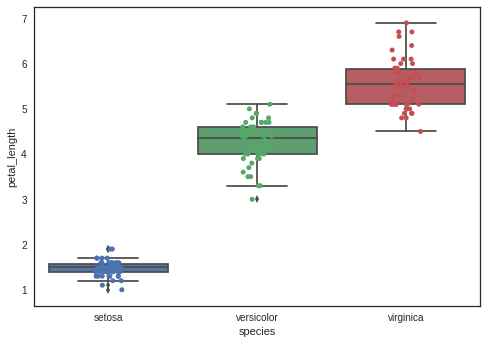

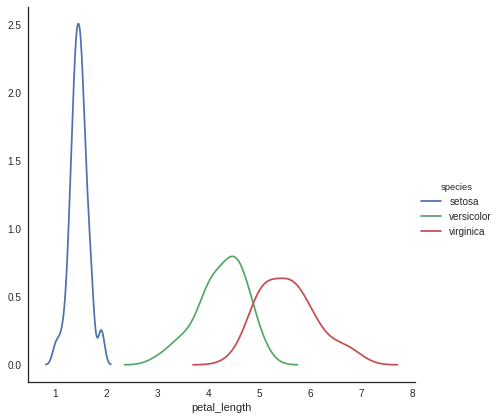

In [478]:
feature_distribution(df, "petal_length", "species")
feature_density(df, "petal_length", "species")

Similar to `petal_length`, `petal_width` is a good feature with the same reason.

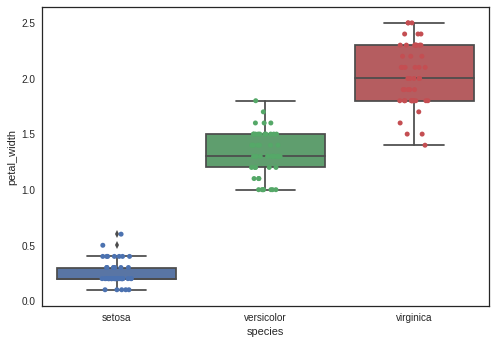

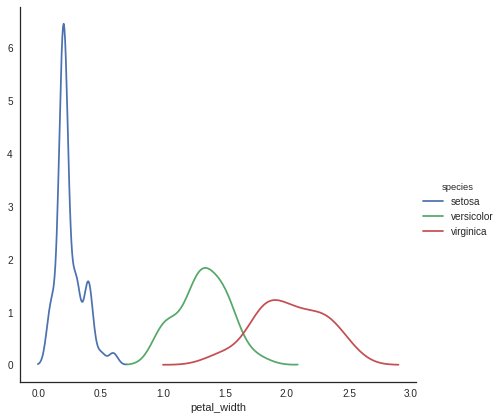

In [479]:
feature_distribution(df, "petal_width", "species")
feature_density(df, "petal_width", "species")

## 2.3. Correlation of features

A feature may help model distinguish (incompletely) classes. However, two or more features can share the same refection to target (label / class). In this case, they are redundant or irrelevant and we should keep one instead all of them in order to improve performance for model.

The bellow chart will plot all samples in diffrent colors (corresponding to classes). If almost of sample is overlap in a chart, this mean this pair of features might be correlation.

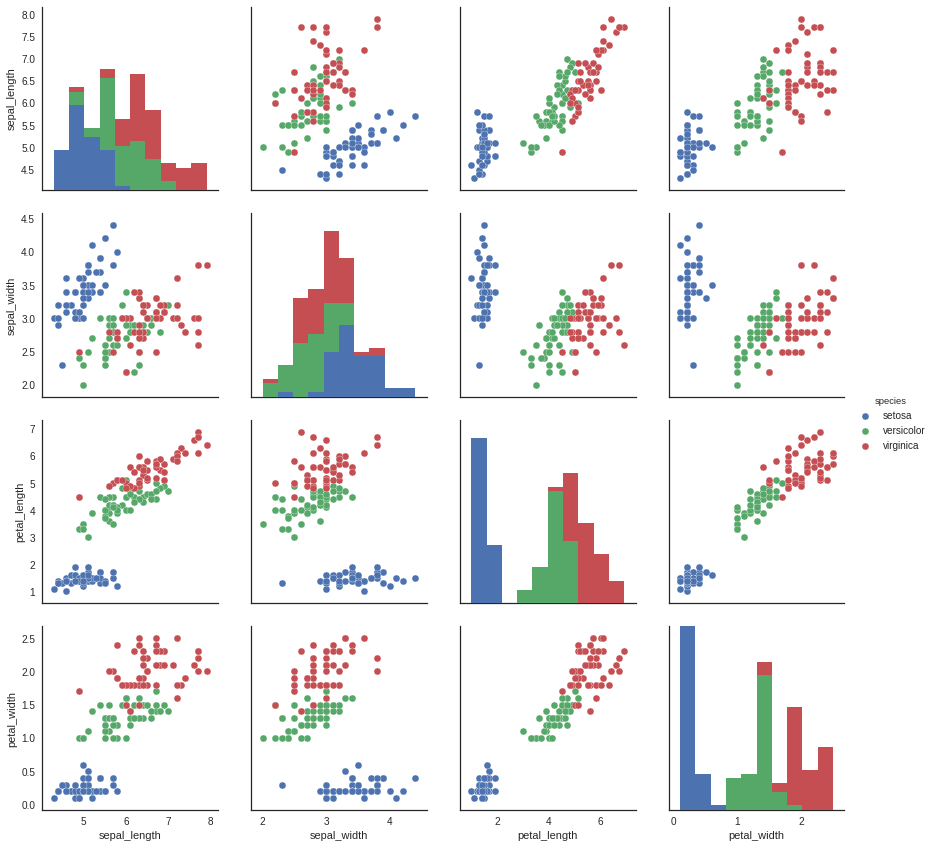

In [382]:
#sns.jointplot(x = "sepal_length_cm", y = "sepal_width_cm", data = df, size = 5)
#sns.FacetGrid(df, hue = "target", size = 5) \
#   .map(plt.scatter, "sepal_length_cm", "sepal_width_cm") \
#   .add_legend()

#sns.pairplot(df.drop("id", axis = 1), hue = "target", size = 3)
sns.pairplot(df1, hue = "species", size = 3)

However, the none of above pairs of features show correlation. Especially, `setosa` seems to be split out to a seperated area, while `virginica` and `versicolor` are just mixed a bit in all cases. That means the dataset is well for classifying.

Pick randomly a pair of features `sepal_length` and `sepal_width`, the correlation (based on [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)) score is not equal to 0. It means they are not correlation in math. See below figure for more detailed information:

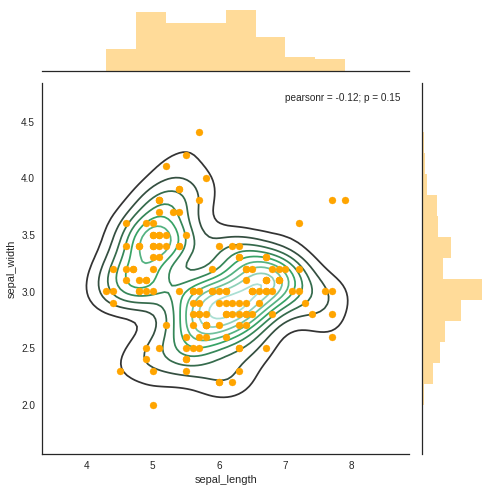

In [459]:
#sns.jointplot(x = "sepal_length", y = "sepal_width", data = df1, size = 7, 
#              kind = "kde", space = 0, zorder = 0, color = "k")

g = (sns.jointplot("sepal_length", "sepal_width", data = df1, size = 7, color = "orange")
        .plot_joint(sns.kdeplot, zorder = 0, n_levels = 10))

## 2.5. Global view of features

Lastly, I apply parallel coordinates to show correlation and distribution globally in a context of all features on all samples.

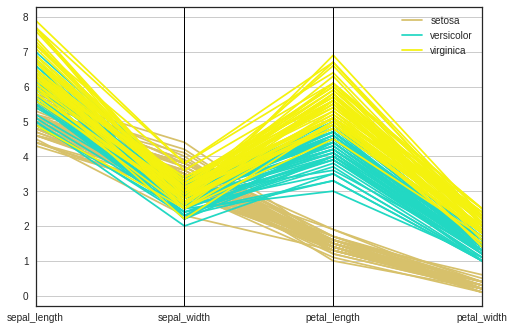

In [460]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(df, "species")

A pair of `petal_length` and `petal_width` can show us clear patterns. But a bit harder on `sepal_length` and `sepal_width`.

***In overall, the dataset is good for training and we do not need to eleminate any feature before feeding to any learning model.***

# 3. Method

## 3.1. Analyze and brief method introduction
The requirements are:
1. Returns the ten most similar data points
2. Classify the new species into one of the 3 classes

This is a multiple classes classification, and based on neighbors. So that, kNN (k Nearest Neighbors Classification) is the most suitable approach. 

kNN, so called `Lazy Learner` which againsts `Eager Learner` (most classification algorithms), where it made all the model building effort has to be performed again everytime prediction.

In this method, training data is first plotted on an n-dimensional space (corresponding to number of data-attributes). Each point is labeled with its class value.

During classifying process, point is plotted on this n-dimensional space and class labels of nearest `k` data points are noted. That class which occurs for the **maximum number of times** among the `k` nearest data points is taken as the class of the new data-point. That is, decision is by **voting** of `k` **neighbors**.

For more detailed information about kNN, visit following link:
```
https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
```


## 3.2. Prepare training dataset and testing dataset

I split the Iris dataset into a training dataset and testing dataset, where
- training dataset: kNN can use to make predictions 
- testing dataset: use to evaluate the accuracy of the model

The ratio 80/20 is used.

In [712]:
# Suffer indices of samples to make training and testing datasets
np.random.seed(0)
indices = np.random.permutation(len(X))
cut_pos = int(len(X) * 0.2) # 80% for training dataset, 20% for testing dataset

# Build training dataset from iris dataset
X_train = X[indices[:-cut_pos]].tolist()
y_train = y[indices[:-cut_pos]].tolist()
#cut_pos, indices, len(X), len(X_train)

# Build testing dataset from iris dataset
X_test  = X[indices[-cut_pos:]].tolist()
y_test  = y[indices[-cut_pos:]].tolist()

# Test
#X_train, X_test, y_train, y_test

## 3.3. Similarity distance

In order to get know nearest neighbors, I need a distance method to calculate similarity between any two given data instances. Once distance method is defined, I able to locate the k most similar data instances in the training dataset for a given instances in testing dataset during predicting process.

Because all feature are in numeric, I use Euclidean distance measure defined as the square root of the sum of the squared differences of 2 numeric vectors.

In [681]:
import math

# Defination of Euclidean distance
def euclidean(x1, x2):
    dist = 0
    for i in range(len(x1)):
        dist += pow((x1[i] - x2[i]), 2)
    return math.sqrt(dist)

# Use basic Euclidean to calculate distance between data of two given samples.
# The distance measuring can be changed to another approach, 
# it depends on the problem and characteristic of data.
def distance(x1, x2):
    return euclidean(x1, x2) if len(x1) == len(x2) else math.inf

# Test
distance([1, 2, 3], [1, 2, 3]), distance([1, 2, 3], [2, 3, 1])

(0.0, 2.449489742783178)

## 3.4. Neighbors

Once similarity measure is defined, I can collect the k most similar neighbors for an unseen instance.

Todo this, I calculate distances from all instances, then select a subset with `k` smallest distance values.

In [682]:
import operator 

def neighbors(train_data, train_target, instance, k = 10):
    dists = []
    n_samples = len(train_data)
    for x in range(len(train_data)):
        dist = distance(instance, train_data[x])
        dists.append((train_data[x] + [train_target[x]], dist))
    dists.sort(key = operator.itemgetter(1))
    ns = []
    for x in range(k if k < n_samples else n_samples):
        ns.append(dists[x][0])
    return ns

# Test function
data = [[1, 1, 1, 1], [8, 8, 8, 8], [9, 9, 9, 9]]
target = ["c1", "c2", "c2"]
instance = [6, 6, 6, 6]
neighbors(data, target, instance, k = 1), neighbors(data, target, instance, k = 2)

([[8, 8, 8, 8, 'c2']], [[8, 8, 8, 8, 'c2'], [9, 9, 9, 9, 'c2']])

Here I prepare some widgets that allow user to define values of features for an instance. Once values are filled, click button `Retrieve similar data points` to return results for **[Requirement 3A]**.

In [709]:
from ipywidgets import widgets
from IPython.display import display, clear_output

c_f1 = widgets.Text(description = "sepal_length", value = "6.3")
c_f2 = widgets.Text(description = "sepal_width", value = "3.3")
c_f3 = widgets.Text(description = "petal_length", value = "6.0")
c_f4 = widgets.Text(description = "petal_width", value = "2.5")
c_k = widgets.Text(description = "nr. similar points", value = "10")
button = widgets.Button(description = "Retrieve similar data points")
display(c_f1, c_f2, c_f3, c_f4, c_k, button)

def handle_submit(sender):
    clear_output()
    input = [float(c_f1.value), float(c_f2.value), float(c_f3.value), float(c_f4.value)]
    #6.3, 3.3, 6.0, 2.5
    for n in neighbors(X_train, y_train, input, k = 10):
        print(n)
    
button.on_click(handle_submit)

[5.4, 3.7, 1.5, 0.2, 'setosa']
[5.3, 3.7, 1.5, 0.2, 'setosa']
[5.2, 3.5, 1.5, 0.2, 'setosa']
[5.1, 3.8, 1.6, 0.2, 'setosa']
[5.4, 3.9, 1.3, 0.4, 'setosa']
[5.4, 3.9, 1.7, 0.4, 'setosa']
[5.4, 3.4, 1.7, 0.2, 'setosa']
[5.4, 3.4, 1.5, 0.4, 'setosa']
[5.2, 3.4, 1.4, 0.2, 'setosa']
[5.1, 3.5, 1.4, 0.2, 'setosa']


## 3.5. Voting

Once I have located the `k` most similar neighbors for a given instance, the next task is to devise a prediction based on found neighbors.

The strategy is allowing each neighbor to vote for their class, and take the majority vote as the prediction.

In [710]:
import operator

# Vote best classes in given neighbors
def vote(samples):
    votes = {} # dictionary stores { target / class : count } in given samples
    for x in range(len(samples)):
        target = samples[x][-1]
        if target in votes:
            votes[target] += 1
        else:
            votes[target] = 1
    return sorted(votes.items(), key = operator.itemgetter(1), reverse = True)[0][0]

# Test
vote([[1, 1, 1, 'a'], [2, 2, 2, 'a'], [6, 6, 6,'b']])

'a'

## 3.6. Prediction

Now, finding nearest neighbors and voting methods are ready, I put them into a pipeline to process predicting `testing dataset` (without classes information) for **[Requirement 3B]**.

The predicted result will be compare directly with actual classes of instances alongside with `testing dataset`.

In [685]:
def predict(train_data, train_target, test_data, k = 10):
    predictions = []
    for instance in test_data:
        ns = neighbors(train_data, train_target, instance, k)
        predictions.append(vote(ns))
    return predictions

# Test
result = predict(X_train, y_train, X_test)
for i in range(len(result)):
    print('predicted=' + repr(result[i]) + ', actual=' + repr(y_test[i]))

predicted='setosa', actual='setosa'
predicted='virginica', actual='virginica'
predicted='setosa', actual='setosa'
predicted='setosa', actual='setosa'
predicted='virginica', actual='virginica'
predicted='setosa', actual='setosa'
predicted='virginica', actual='virginica'
predicted='versicolor', actual='versicolor'
predicted='versicolor', actual='versicolor'
predicted='versicolor', actual='versicolor'
predicted='virginica', actual='virginica'
predicted='virginica', actual='virginica'
predicted='virginica', actual='versicolor'
predicted='virginica', actual='versicolor'
predicted='setosa', actual='setosa'
predicted='versicolor', actual='versicolor'
predicted='virginica', actual='virginica'
predicted='virginica', actual='virginica'
predicted='setosa', actual='setosa'
predicted='versicolor', actual='versicolor'
predicted='versicolor', actual='versicolor'
predicted='virginica', actual='versicolor'
predicted='versicolor', actual='versicolor'
predicted='setosa', actual='setosa'
predicted='setosa

## 3.7. Check accuracy

Finally, I had all pieces of the kNN algorithm in place. Last remaining task is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made, called the classification accuracy.

In [689]:
def accuracy(actual_set, predicted_set):
    correct = 0
    length = len(actual_set)
    for x in range(length):
        if actual_set[x] == predicted_set[x]:
            correct += 1
    return (correct / float(length)) * 100.0

# Test
print('Test accuracy function: ' + repr(accuracy(["a", "a", "b"], ["a", "a", "a"])) + '%')

Test accuracy function: 66.66666666666666%


Run on `testing dataset`:

In [691]:
acc = accuracy(y_test, result)
print('Accuracy: ' + repr(acc) + '%')

Accuracy: 90.0%


# 4. Future works

## 4.1. Deal with changes of features

In order to dealing with another problem, the set of features gonna be defined. They might be supervised or unsupervied picked. Therefore, some extended works should be take into account:
1. Feature selection: to reduce number of unuseful or redandunt features.
2. Dimension reduction: when I got a sparse dataset and huge number of features.
3. Normalization: the additional features might be text, continous or discrete number. Normalization process is need to:
    1. Transform different feature' types into same feature space
    2. Reduce range of data, i.e. continous number to range, or range of number to norminal / binary
4. Weighted features: depend on the importance of feature againts the rest.

## 4.2. Improve searching method

The current method is brute-force scanning and calculating nearest neighbors on all possible instances in `train dataset`. In fact, we can change it to another solution like regression, hierarchical clustering or any heuristic search. 

In other hand, the distance measure also depend on characteristic of problem. So a domain-specific measuring is need instead of basic Euclidean distance measure.

## 4.3. Try other methods

In real world, the predicted result is not always a class, so the problem can be extends to multiple-labels classification.